# Climatology plts

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np

In [2]:
clim_ecco = xr.open_dataset('/home/jovyan/WMT-project/ECCO-budgets/clim_ecco')
clim_soda = xr.open_dataset('/home/jovyan/WMT-project/SODA/clim_soda')
clim_sose = xr.open_dataset('/home/jovyan/WMT-project/SOSE-budgets/clim_sose')

In [3]:
clim_ecco

<xarray.Dataset>
Dimensions:              (sigma2_bin: 37, month: 12)
Coordinates:
  * sigma2_bin           (sigma2_bin) float64 1.037e+03 1.037e+03 ... 1.037e+03
  * month                (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    dVdt_clim            (month, sigma2_bin) float64 ...
    psi_vel_clim         (month, sigma2_bin) float64 ...
    omega_clim           (month, sigma2_bin) float64 ...
    omega_mix__clim      (month, sigma2_bin) float64 ...
    omega_surf_slt_clim  (month, sigma2_bin) float64 ...
    omega_surf_th_clim   (month, sigma2_bin) float64 ...
    R1_clim              (month, sigma2_bin) float64 ...
    R2_clim              (month, sigma2_bin) float64 ...

In [4]:
bot_ecco = - clim_ecco.isel(sigma2_bin=-1) + clim_ecco.sel(sigma2_bin=0, method='nearest')
bot_soda = - clim_soda.isel(sigma2_bin=-1) + clim_soda.sel(sigma2_bin=0, method='nearest')
bot_sose = - clim_sose.isel(sigma2_bin=-1) + clim_sose.sel(sigma2_bin=0, method='nearest')

In [5]:
bot_ecco

<xarray.Dataset>
Dimensions:              (month: 12)
Coordinates:
  * month                (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    dVdt_clim            (month) float64 -7.482 -6.394 -5.614 ... -5.708 -6.558
    psi_vel_clim         (month) float64 -7.773 -6.482 -6.899 ... -5.642 -6.524
    omega_clim           (month) float64 -0.5784 0.1237 1.449 ... 0.0139 -0.5036
    omega_mix__clim      (month) float64 -1.527 -1.659 -1.847 ... -1.845 -1.388
    omega_surf_slt_clim  (month) float64 0.4993 1.171 2.31 ... 1.138 0.5521
    omega_surf_th_clim   (month) float64 -0.1366 -0.07017 ... -0.002732 -0.2199
    R1_clim              (month) float64 0.8513 -0.01712 ... -0.06259 0.5015
    R2_clim              (month) float64 0.5944 0.6811 1.0 ... 0.7229 0.5132

In [6]:
clim_budget = - bot_ecco.dVdt_clim + bot_ecco.psi_vel_clim + bot_ecco.omega_clim + bot_ecco.R1_clim + bot_ecco.R2_clim
clim_budget

<xarray.DataArray (month: 12)>
array([0.5760818 , 0.69986551, 1.01887501, 0.9568114 , 1.08218511,
       0.95881758, 0.92340411, 1.09549171, 0.9554092 , 0.87291528,
       0.74041045, 0.54542651])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [7]:
clim_bdgt_nores = - bot_ecco.dVdt_clim + bot_ecco.psi_vel_clim + bot_ecco.omega_clim
clim_bdgt_nores

<xarray.DataArray (month: 12)>
array([-0.86958768,  0.0358967 ,  0.16412374,  0.04092431, -0.78614621,
        0.07576352, -0.09126651, -0.25802547, -0.45674962,  0.19938516,
        0.08007257, -0.46918841])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

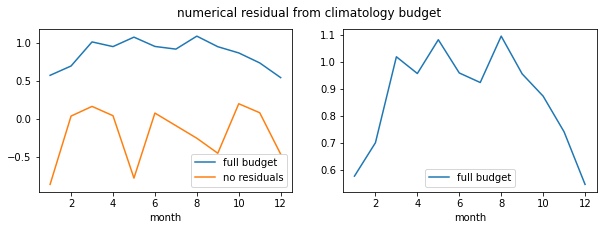

In [8]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))
clim_budget.plot(ax=ax0, label='full budget')
clim_bdgt_nores.plot(ax=ax0, label='no residuals')

clim_budget.plot(ax=ax1, label='full budget')

ax0.legend()
ax1.legend()
plt.suptitle('numerical residual from climatology budget');

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(dVdt_clim_bot, label='dVdt', color='k')
plt.plot((omega_clim_bot+R2_clim_bot), label=r'$\Omega^*$', color='green')
plt.plot(psi_clim_bot, label=r'$\Psi$', color='red')
plt.plot(R1_clim_bot, label='R1', color='lightslategray', linestyle='--')
#plt.plot(R2_clim_bot, label='R2', color='salmon', linestyle='--')
plt.title(r'Bottom wm 1037.125 - 1037.3 [$\frac{kg}{m^3}$]', pad=15)
plt.ylabel('Sv', fontsize=14, labelpad=20)
plt.xlabel('Months', fontsize=14, labelpad=20)
plt.xlim(0, 11)

plt.legend()
plt.grid();

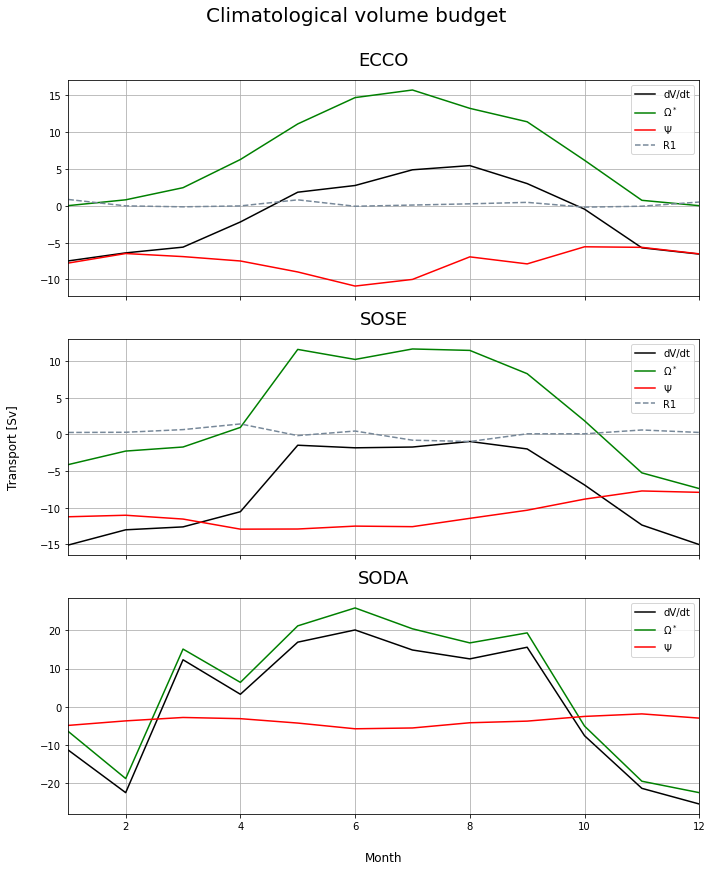

In [24]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(10,12), sharex=True)

bot_ecco.dVdt_clim.plot(label='dV/dt', color='k', ax=ax0)
(bot_ecco.omega_clim+bot_ecco.R2_clim).plot(label=r'$\Omega^*$', color='green', ax=ax0)
bot_ecco.psi_vel_clim.plot(label=r'$\Psi$', color='red', ax=ax0)
bot_ecco.R1_clim.plot(label='R1', color='lightslategray', linestyle='--', ax=ax0)
ax0.set_xlabel('')
ax0.set_ylabel('')
ax0.legend()
ax0.grid()
ax0.set_title('ECCO', fontsize=18, pad=15)
ax0.set_xlim(1, 12)

bot_sose.dVdt_clim.plot(label='dV/dt', color='k', ax=ax1)
(bot_sose.omega_clim+bot_sose.R2_clim).plot(label=r'$\Omega^*$', color='green', ax=ax1)
bot_sose.psi_vel_clim.plot(label=r'$\Psi$', color='red', ax=ax1)
bot_sose.R1_clim.plot(label='R1', color='lightslategray', linestyle='--', ax=ax1)
ax1.set_ylabel(r'Transport [Sv]', fontsize=12, labelpad=20)
ax1.set_title('SOSE', fontsize=18, pad=15)
ax1.set_xlabel('')
ax1.legend()
ax1.grid()

bot_soda.dVdt_clim.plot(label='dV/dt', color='k', ax=ax2)
bot_soda.omega_clim.plot(label=r'$\Omega^*$', color='green', ax=ax2)
bot_soda.psi_vel_clim.plot(label=r'$\Psi$', color='red', ax=ax2)
ax2.grid()
ax2.legend()
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.set_title('SODA', fontsize=18, pad=15)
ax2.set_xlabel('Month', fontsize=12, labelpad=20)

plt.suptitle('Climatological volume budget', fontsize=20, y=1.005)
plt.tight_layout();

## $\Omega$'s components

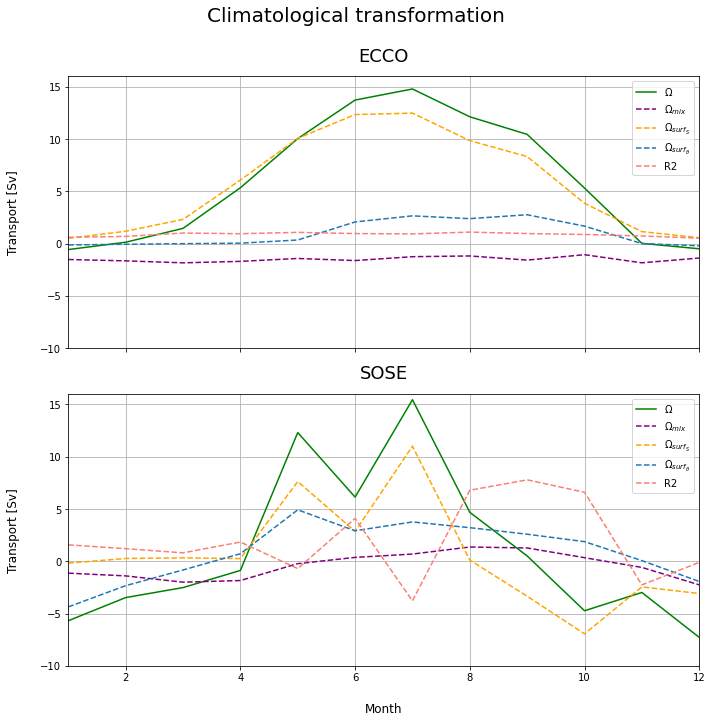

In [33]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,10), sharex=True)

bot_ecco.omega_clim.plot(label=r'$\Omega$', color='green', ax=ax0)
bot_ecco.omega_mix__clim.plot(label=r'$\Omega_{mix}$', color='purple', linestyle='dashed', ax=ax0)
bot_ecco.omega_surf_slt_clim.plot(label=r'$\Omega_{surf_S}$', color='orange', linestyle='dashed', ax=ax0)
bot_ecco.omega_surf_th_clim.plot(label=r'$\Omega_{surf_\theta}$', color='C0', linestyle='dashed', ax=ax0)
bot_ecco.R2_clim.plot(label='R2', color='salmon', linestyle='--', ax=ax0)
ax0.set_xlabel('')
ax0.set_ylabel(r'Transport [Sv]', fontsize=12, labelpad=20)
ax0.legend()
ax0.grid()
ax0.set_title('ECCO', fontsize=18, pad=15)
ax0.set_ylim(-10,16)
ax0.set_xlim(1, 12)

bot_sose.omega_clim.plot(label=r'$\Omega$', color='green', ax=ax1)
bot_sose.omega_mix__clim.plot(label=r'$\Omega_{mix}$', color='purple', linestyle='dashed', ax=ax1)
bot_sose.omega_surf_slt_clim.plot(label=r'$\Omega_{surf_S}$', color='orange', linestyle='dashed', ax=ax1)
bot_sose.omega_surf_th_clim.plot(label=r'$\Omega_{surf_\theta}$', color='C0', linestyle='dashed', ax=ax1)
bot_sose.R2_clim.plot(label='R2', color='salmon', linestyle='--', ax=ax1)
ax1.grid()
ax1.legend()
ax1.set_xlabel('Month', fontsize=12, labelpad=20)
ax1.set_ylabel(r'Transport [Sv]', fontsize=12, labelpad=20)
ax1.set_title('SOSE', fontsize=18, pad=15)
ax1.set_ylim(-10,16)


plt.suptitle('Climatological transformation', fontsize=20, y=1)
plt.tight_layout();